In [6]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
from zipfile import ZipFile

dataset = r'D:\ML Projects\FaceMaskDetection\face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split

In [9]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [11]:
!pip install --upgrade opencv-python-headless


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
with_mask_files = os.listdir('D:\ML Projects\FaceMaskDetection\data\with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [13]:
without_mask_files = os.listdir('D:\ML Projects\FaceMaskDetection\data\without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [15]:
#Labels for the two class of Images

#with mask --> 1

#without mask --> 0

In [16]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [17]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


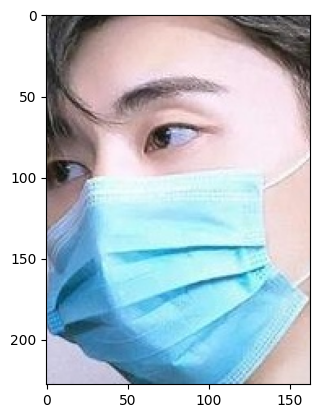

In [20]:
img = mpimg.imread('D:/ML Projects/FaceMaskDetection/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

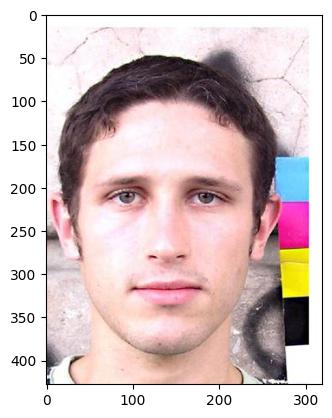

In [21]:
img = mpimg.imread('D:/ML Projects/FaceMaskDetection/data/without_mask/without_mask_1234.jpg')
imgplot = plt.imshow(img)
plt.show()

In [22]:
from PIL import Image


In [23]:
with_mask_path = 'D:/ML Projects/FaceMaskDetection/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'D:/ML Projects/FaceMaskDetection/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

C:\Users\praty\AppData\Roaming\Python\Python38\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
len(data)

7553

In [25]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(128, 128, 3)

In [28]:
X = np.array(data)
Y = np.array(labels)

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
!pip install scikit-learn




Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\praty\appdata\roaming\python\python38\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [32]:
import sys
print(sys.path)



['c:\\Program Files\\Python38\\python38.zip', 'c:\\Program Files\\Python38\\DLLs', 'c:\\Program Files\\Python38\\lib', 'c:\\Program Files\\Python38', '', 'C:\\Users\\praty\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\praty\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32', 'C:\\Users\\praty\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32\\lib', 'C:\\Users\\praty\\AppData\\Roaming\\Python\\Python38\\site-packages\\Pythonwin', 'c:\\Program Files\\Python38\\lib\\site-packages']


In [33]:
from sklearn.model_selection import train_test_split




In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [36]:

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [37]:
X_train[0]

array([[[226, 234, 201],
        [211, 216, 188],
        [188, 188, 169],
        ...,
        [186, 181, 165],
        [179, 175, 150],
        [166, 181, 136]],

       [[224, 228, 218],
        [201, 204, 195],
        [201, 199, 192],
        ...,
        [197, 190, 182],
        [175, 170, 153],
        [162, 180, 143]],

       [[205, 204, 212],
        [221, 220, 226],
        [195, 192, 196],
        ...,
        [183, 174, 173],
        [172, 167, 159],
        [181, 199, 171]],

       ...,

       [[156, 176, 197],
        [159, 180, 196],
        [164, 185, 196],
        ...,
        [ 89,  99,  71],
        [106, 113,  83],
        [ 99, 103,  68]],

       [[151, 177, 196],
        [167, 190, 208],
        [174, 192, 210],
        ...,
        [106, 113,  80],
        [ 99, 104,  64],
        [ 98,  98,  41]],

       [[162, 192, 210],
        [177, 199, 220],
        [175, 189, 213],
        ...,
        [103, 107,  70],
        [ 79,  80,  46],
        [ 99,  94,  61]]

In [38]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5, batch_size=16)

model.save(r'D:\ML Projects\FaceMaskDetection\model.h5')


Epoch 1/5
340/340 [==============================] - 277s 810ms/step - loss: 0.3786 - accuracy: 0.8444 - val_loss: 0.2406 - val_accuracy: 0.9124
Epoch 2/5
340/340 [==============================] - 279s 821ms/step - loss: 0.2093 - accuracy: 0.9156 - val_loss: 0.2474 - val_accuracy: 0.9041
Epoch 3/5
340/340 [==============================] - 264s 776ms/step - loss: 0.1418 - accuracy: 0.9437 - val_loss: 0.1851 - val_accuracy: 0.9405
Epoch 4/5
340/340 [==============================] - 275s 809ms/step - loss: 0.0989 - accuracy: 0.9619 - val_loss: 0.2288 - val_accuracy: 0.9388
Epoch 5/5
340/340 [==============================] - 302s 888ms/step - loss: 0.0652 - accuracy: 0.9781 - val_loss: 0.2570 - val_accuracy: 0.9174


C:\Users\praty\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 15s 298ms/step - loss: 0.2233 - accuracy: 0.9265
Test Accuracy = 0.9265387058258057


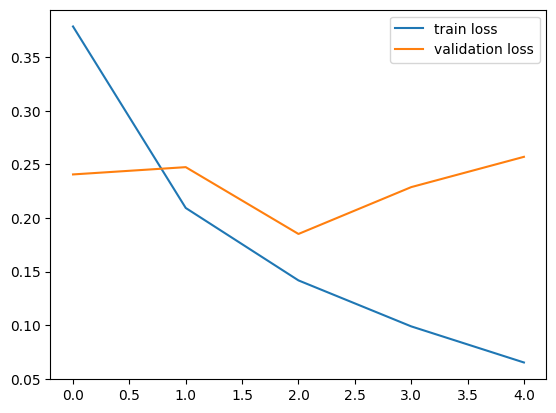

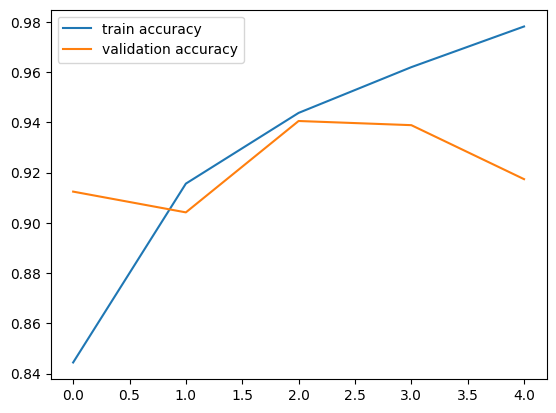

In [48]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [49]:
model.save(r'D:\ML Projects\FaceMaskDetection\model.h5')


Loading image from: D:\ML Projects\FaceMaskDetection\data\with_mask\with_mask_334.jpg


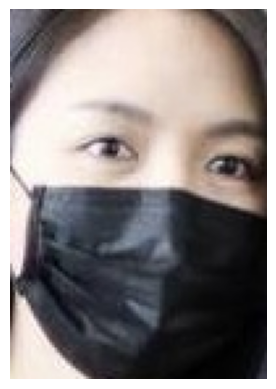

1/1 [==============================] - 0s 63ms/step
Raw prediction: [[0.00154504 0.9984549 ]]
Predicted label index: 1
The person in the image is wearing a mask


In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

model = keras.models.load_model('D:\\ML Projects\\FaceMaskDetection\\model.h5')

input_image_path = input('Path of the image to be predicted: ')
print(f"Loading image from: {input_image_path}")

input_image = cv2.imread(input_image_path)

if input_image is not None:
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    plt.imshow(input_image_rgb)
    plt.axis('off')
    plt.show()

    input_image_resized = cv2.resize(input_image_rgb, (128, 128))  
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
    
    input_prediction = model.predict(input_image_reshaped)
    print("Raw prediction:", input_prediction)
    input_pred_label = np.argmax(input_prediction)  
    
    print("Predicted label index:", input_pred_label)

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')
else:
    print("Error: Image not found. Please check the path.")


Loading image from: D:\ML Projects\FaceMaskDetection\data\without_mask\without_mask_7.jpg


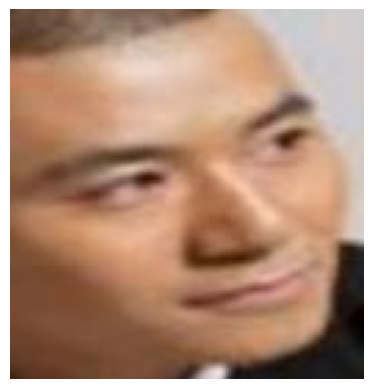

1/1 [==============================] - 0s 70ms/step
Raw prediction: [[9.9960297e-01 3.9701627e-04]]
Predicted label index: 0
The person in the image is not wearing a mask


In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

model = keras.models.load_model('D:\\ML Projects\\FaceMaskDetection\\model.h5')

input_image_path = input('Path of the image to be predicted: ')
print(f"Loading image from: {input_image_path}")

input_image = cv2.imread(input_image_path)

if input_image is not None:
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    plt.imshow(input_image_rgb)
    plt.axis('off')
    plt.show()

    input_image_resized = cv2.resize(input_image_rgb, (128, 128))  
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
    
    input_prediction = model.predict(input_image_reshaped)
    print("Raw prediction:", input_prediction)
    input_pred_label = np.argmax(input_prediction)  
    
    print("Predicted label index:", input_pred_label)

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')
else:
    print("Error: Image not found. Please check the path.")
